# Pizza Data Analysis
* This dataset is taken from Kaggle.
* Here is the link: [pizza](https://www.kaggle.com/datafiniti/pizza-restaurants-and-the-pizza-they-sell)

---

### We're going to answer the following questions:
1. The most popular Pizza Restaurant Chains
2. The most popular types of Pizzas.
3. The State's with the most Pizza Restaurant.
4. The Average Price per State of Pizza.
4. Where are Pizza Restaurant Located?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pizza =pd.read_csv('8358_1.csv')
pizza.head(5)

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [3]:
from zipfile import ZipFile
zf = ZipFile('14zpallagi.csv.zip') 
# if you want to see all files inside zip folder
print(zf.namelist()) 

['14zpallagi.csv']


In [4]:
zipcode =pd.read_csv(zf.open('14zpallagi.csv'))
zipcode.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
1,1,AL,0,2,491370.0,200750.0,150290.0,125560.0,281350.0,1016010.0,...,397110.0,950446.0,0.0,0.0,0.0,0.0,70780.0,101969.0,413790.0,1177400.0
2,1,AL,0,3,259540.0,75820.0,142970.0,34070.0,156720.0,589190.0,...,250230.0,1319641.0,0.0,0.0,0.0,0.0,62170.0,132373.0,192050.0,538160.0
3,1,AL,0,4,164840.0,26730.0,125410.0,10390.0,99750.0,423300.0,...,163580.0,1394913.0,0.0,0.0,0.0,0.0,45120.0,124048.0,115470.0,375882.0
4,1,AL,0,5,203650.0,18990.0,177070.0,5860.0,122670.0,565930.0,...,203050.0,3655700.0,610.0,135.0,270.0,66.0,81180.0,387298.0,114380.0,448442.0


### Zip codes file is included to combine it with pizza dataframe

# EDA and Feature Engineering
### To get the feel of data and convert raw data into more refined and easy to use form

In [5]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   float64
 7   longitude           3510 non-null   float64
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2948 non-null   float64
 10  menus.amountMin     2948 non-null   float64
 11  menus.currency      2951 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

In [6]:
pizza.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,3510.000000,3510.000000,2948.000000,2948.000000,1557.000000,1557.000000
mean,38.555114,-87.472055,12.479186,11.427849,15.597945,36.566474
std,4.651092,16.430008,13.398923,7.262919,18.495854,21.737839
min,18.411826,-157.837461,0.000000,0.000000,0.000000,12.000000
25%,35.769852,-94.202573,7.500000,7.000000,0.000000,30.000000
50%,40.020710,-81.675414,11.870000,10.990000,25.000000,40.000000
75%,41.455179,-74.743820,15.950000,14.950000,25.000000,40.000000
max,64.854370,-66.024871,312.950000,118.990000,347.000000,666.000000


## 1. Most Popular Restaurant

In [7]:
# extract interested columns
pizza_sub = pizza.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()
pizza_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   city             3510 non-null   object 
 2   address          3510 non-null   object 
 3   postalCode       3484 non-null   object 
 4   menus.name       3510 non-null   object 
 5   latitude         3510 non-null   float64
 6   longitude        3510 non-null   float64
 7   menus.amountMax  2948 non-null   float64
 8   menus.amountMin  2948 non-null   float64
dtypes: float64(4), object(5)
memory usage: 246.9+ KB


,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [8]:
pizza_name_df_count= pizza.groupby(['name']).size().to_frame('count').reset_index()
pizza_name_df_count.sort_values(by='count', ascending=False)[:10]

,name,count
732,Sicilia's Pizzeria,96
371,J & G Restaurant,55
162,Casey's General Store,43
832,The Pizza Joint,36
569,North End Pizzeria,34
428,Labella Pizza and Pasta,31
318,Giovanni's Pizzeria,30
562,Nino's Trattoria & Pizzeria,28
603,Papa John's Pizza,27
774,Takka Grill,26


## So these are the top 10 most popular Pizza restaurants

## 2. Most Popular Pizza

In [9]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])
pizza_sub.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [10]:
names_of_pizza = pizza_sub['menus.name'].value_counts()
names_of_pizza

Cheese Pizza                              130
White Pizza                                74
Pizza                                      62
Margherita Pizza                           60
Hawaiian Pizza                             53
                                         ... 
Pizza Tomato Sauce Cheese Blend             1
Pizza Bianca (without Tomato Sauce)         1
4 or More Items Pizza                       1
Prosciutto Arugula Artisan Crust Pizza      1
Prosciutto and Fig Pizza                    1
Name: menus.name, Length: 1598, dtype: int64

In [11]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')

pizza_sub.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1


In [12]:
pizza_sub['menus.name_x'].value_counts()

Cheese Pizza                              130
White Pizza                                74
Pizza                                      62
Margherita Pizza                           60
Hawaiian Pizza                             53
                                         ... 
Pizza Tomato Sauce Cheese Blend             1
Pizza Bianca (without Tomato Sauce)         1
4 or More Items Pizza                       1
Prosciutto Arugula Artisan Crust Pizza      1
Prosciutto and Fig Pizza                    1
Name: menus.name_x, Length: 1598, dtype: int64

In [13]:
x_axis = pizza_sub['menus.name_x'].value_counts().index[:20]

In [14]:
y_axis = pizza_sub['menus.name_x'].value_counts().values[:20]

<AxesSubplot:xlabel='Pizza Name', ylabel='Counts'>

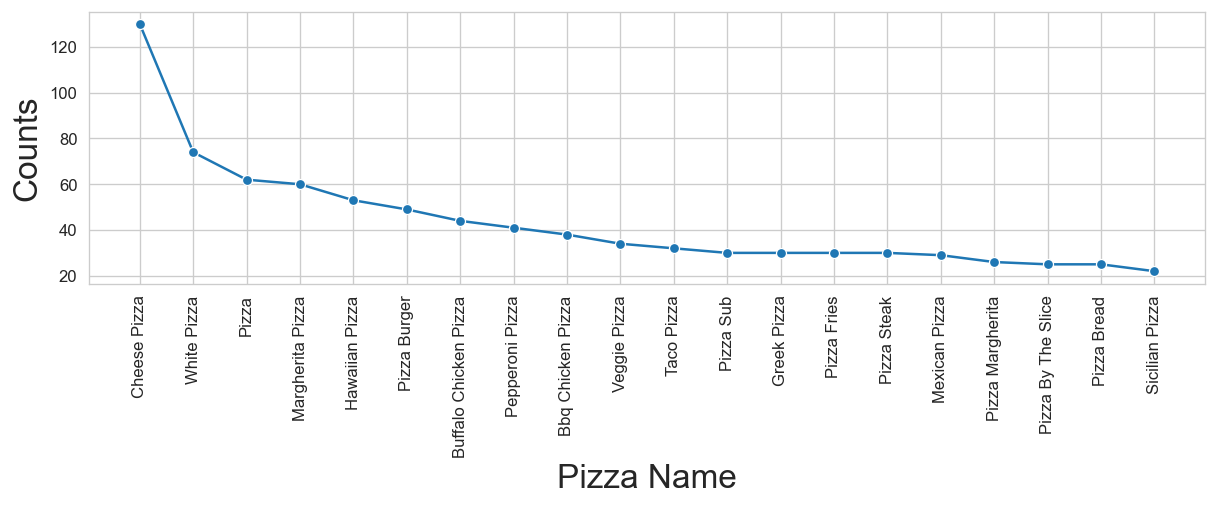

In [15]:
plt.figure(figsize=(12,3),dpi=120)
sns.set_style('whitegrid')
plt.xlabel('Pizza Name', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(rotation=90)
sns.lineplot(x=x_axis,y=y_axis,marker="o")

## 3. State with most Pizza Restaurants

In [16]:
pizza.head(3)

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [17]:
zipcode.head(3)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
1,1,AL,0,2,491370.0,200750.0,150290.0,125560.0,281350.0,1016010.0,...,397110.0,950446.0,0.0,0.0,0.0,0.0,70780.0,101969.0,413790.0,1177400.0
2,1,AL,0,3,259540.0,75820.0,142970.0,34070.0,156720.0,589190.0,...,250230.0,1319641.0,0.0,0.0,0.0,0.0,62170.0,132373.0,192050.0,538160.0


In [18]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
6,1,AL,35004,1,1510.0,970.0,230.0,270.0,740.0,2130.0,...,740.0,645.0,0.0,0.0,0.0,0.0,130.0,112.0,1300.0,2660.0
12,1,AL,35005,1,1360.0,770.0,190.0,380.0,780.0,2310.0,...,620.0,520.0,0.0,0.0,0.0,0.0,80.0,62.0,1230.0,3277.0
18,1,AL,35006,1,460.0,280.0,100.0,70.0,270.0,690.0,...,240.0,200.0,0.0,0.0,0.0,0.0,40.0,25.0,390.0,759.0
24,1,AL,35007,1,4180.0,2730.0,570.0,800.0,1780.0,5920.0,...,2150.0,1900.0,0.0,0.0,0.0,0.0,480.0,361.0,3440.0,6643.0


In [19]:
zipcode = zipcode[['STATE','zipcode']]
zipcode.head()

,STATE,zipcode
0,AL,0
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [20]:
zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27681 entries, 0 to 166658
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATE    27681 non-null  object
 1   zipcode  27681 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 648.8+ KB


### Need to Convert zipcode dtype from int to String to avoid any further issues

In [21]:
zipcode['zipcode'] = zipcode['zipcode'].astype(str)

In [22]:
zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27681 entries, 0 to 166658
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATE    27681 non-null  object
 1   zipcode  27681 non-null  object
dtypes: object(2)
memory usage: 648.8+ KB


In [23]:
# merge `pizza data` and `zipcode data`
pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
pizza_merge.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE,zipcode
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049


### Joining the zip and Pizza dataframe to make a single data frame

In [24]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')
pizza_clean.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE_x,zipcode,STATE_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701,24.0
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701,24.0
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049,326.0
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049,326.0
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049,326.0


In [25]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# drop unused columns and missing values
pizza_clean = pizza_clean.drop(['id', 'postalCode', 'zipcode'], axis=1).dropna()

# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'pizza_counts', 'state', 'state_counts']

pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0


In [26]:
pizza_state = pd.DataFrame(pizza_clean['state'].value_counts().head(10))
pizza_state

,state
NY,315
CA,299
NJ,260
PA,230
IL,141
CT,122
FL,122
MA,116
OH,114
TX,112


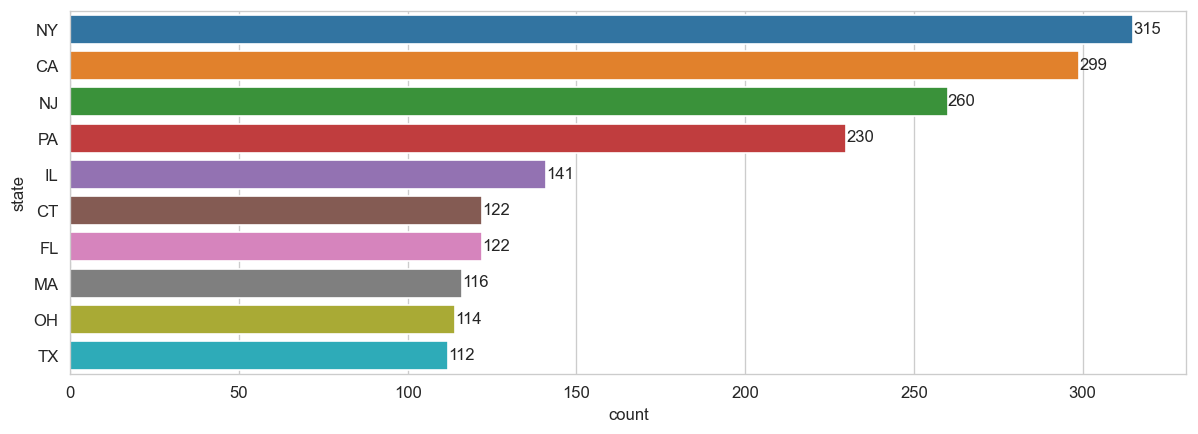

In [27]:
plt.figure(figsize=(12,4),dpi=120)
g = sns.countplot(y = 'state', data = pizza_clean ,order=pizza_clean['state'].value_counts().iloc[:10].index)
# Inorder to add annotation to the graph, .1 is used to put the annotation in middle
for index, value in enumerate(list(pizza_clean.state.value_counts().iloc[:10].values)):
    g.text(value , index + .1, str(value))

## 4. Average Pizza Price per State

In [28]:
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0


In [29]:
pizza_clean['average_price'] = (pizza_clean['menus_amountMax'] + pizza_clean['menus_amountMin']) / 2
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00


#### Top 10 most expensive state in Pizza Prices

In [30]:
pizza_clean.groupby('state')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

,state,average_price
24,MS,15.785455
42,UT,15.673333
8,FL,15.212295
26,NC,14.725137
23,MO,14.673462
3,CA,14.483645
31,NV,14.337500
32,NY,14.227587
43,VA,14.159062
5,CT,13.606230


#### Top 10 most expensive city in Pizza Prices

In [31]:
pizza_clean.groupby('city')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

,city,average_price
314,Marina Del Rey,97.450000
236,Hollywood,69.950000
570,Wellington,65.640000
226,Henrico,48.023333
477,Saint Louis,31.054000
491,Sayville,27.500000
231,Highwood,25.740000
265,Kinston,24.233333
222,Hattiesburg,24.233333
461,Rockingham,24.233333


In [56]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [57]:
pip install geopandas

    ERROR: Command errored out with exit status 1:


  Using cached Fiona-1.8.20.tar.gz (1.3 MB)



     command: 'C:\Users\Dell\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-neqayyv9\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-neqayyv9\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Dell\AppData\Local\Temp\pip-pip-egg-info-3h133qv6'
         cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-neqayyv9\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
